# Business Understanding
Tahap ini melibatkan pemahaman terhadap tujuan bisnis dan kebutuhan yang ingin dicapai melalui analisis data.  perlu memahami masalah yang ingin diselesaikan, sasaran yang ingin dicapai, serta membangun pemahaman tentang bagaimana analisis data dapat memberikan nilai tambah bagi bisnis.

Berdasarkan file "hypertension_data.csv", dapat diasumsikan bahwa dataset ini berisi data terkait hipertensi. Hipertensi adalah kondisi medis di mana tekanan darah seseorang secara konsisten tinggi. Dalam konteks ini, tujuan pengumpulan data untuk mengumpulkan informasi tentang pasien yang menderita hipertensi atau tidak.

In [35]:
import pandas as pd
import numpy as np

# Data Understanding
Tahap ini melibatkan pemahaman mendalam tentang data yang tersedia untuk analisis.  perlu mengeksplorasi, mengevaluasi, dan memahami karakteristik, struktur, serta kualitas data yang ada. Hal ini melibatkan eksplorasi dataset, identifikasi variabel dan atribut yang relevan, serta pemahaman terhadap hubungan antara data yang ada.

Dataset "hypertension_data.csv" yang tersedia di Kaggle adalah kumpulan data yang berkaitan dengan kesehatan dan hipertensi. Berikut ini adalah beberapa informasi tentang data yang dapat dipahami dari dataset tersebut:

1. Jumlah Data: Dataset ini terdiri dari sejumlah 520 data.

2. Atribut:
   - age: Umur pasien dalam tahun.
   - sex: Jenis kelamin pasien (1: Laki-laki, 0: Perempuan).
   - cp: Jenis nyeri dada yang dialami oleh pasien.
   - trestbps: Tekanan darah sistolik dalam mmHg saat istirahat.
   - chol: Kadar kolesterol dalam mg/dL.
   - fbs: Kadar gula darah puasa (1: Gula darah puasa > 120 mg/dL, 0: Gula darah puasa ≤ 120 mg/dL).
   - restecg: Hasil elektrokardiogram (EKG) saat istirahat.
   - thalach: Denyut jantung maksimum yang dicapai selama tes atau observasi.
   - exang: Angina yang dipicu oleh olahraga (1: Ya, 0: Tidak).
   - oldpeak: Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.
   - slope: Kemiringan segmen ST pada EKG.
   - ca: Jumlah pembuluh utama yang diwarnai dengan fluoroskopi.
   - thal: Jenis thalassemia.
   - target: Kondisi hipertensi (1: Hipertensi, 0: Tidak Hipertensi).


# load dataset

In [36]:
df = pd.read_csv('hypertension_data.csv')
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6518,74.0,0.0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [37]:
df = df.drop(['age','sex'], axis=1)

In [38]:
df.sample()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
12081,3,134,234,0,1,145,0,2.6,1,2,2,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        26083 non-null  int64  
 1   trestbps  26083 non-null  int64  
 2   chol      26083 non-null  int64  
 3   fbs       26083 non-null  int64  
 4   restecg   26083 non-null  int64  
 5   thalach   26083 non-null  int64  
 6   exang     26083 non-null  int64  
 7   oldpeak   26083 non-null  float64
 8   slope     26083 non-null  int64  
 9   ca        26083 non-null  int64  
 10  thal      26083 non-null  int64  
 11  target    26083 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.4 MB


In [40]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    elif df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [41]:
numerical

['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [42]:
catgcols

[]

In [43]:
df['target'].value_counts()

1    14274
0    11809
Name: target, dtype: int64

In [44]:
df['target'].value_counts()

1    14274
0    11809
Name: target, dtype: int64

In [45]:
ind_col = [col for col in df.columns if col !='target']
dep_col = 'target'

In [46]:
df[dep_col].value_counts()

1    14274
0    11809
Name: target, dtype: int64

# Data Preparation 
Tahap ini melibatkan persiapan data untuk analisis lebih lanjut. Proses ini mencakup pembersihan data, penggabungan data dari berbagai sumber, transformasi data, serta pemilihan atribut yang relevan. Tujuannya adalah memastikan data siap untuk digunakan dalam proses analisis.

Berikut adalah beberapa langkah yang umum dilakukan dalam data preparation dari dataset "hypertension_data.csv" yang tersedia di situs Kaggle:

1. Pemahaman data: Pertama,  perlu memahami struktur dataset dan makna dari setiap atribut yang ada. Baca dokumentasi yang disediakan dengan dataset untuk memahami nilai-nilai kategori, tipe data, dan informasi penting lainnya tentang atribut-atribut tersebut.

2. Pembersihan data: Identifikasi dan tangani missing values (nilai yang hilang) dalam dataset.  dapat memilih untuk menghapus baris atau kolom dengan missing values, atau mengisi nilai yang hilang dengan metode seperti mean, median, atau modus, tergantung pada konteksnya.

3. Pemilihan atribut: Jika ada atribut yang tidak relevan atau tidak berguna untuk analisis ,Ini dapat membantu mengurangi dimensi data dan meningkatkan efisiensi analisis.

4. Transformasi data: Beberapa atribut mungkin perlu diubah atau ditransformasikan sebelum digunakan. Misalnya, atribut dengan tipe data string dapat diubah menjadi tipe data numerik atau one-hot encoding. Fitur scaling atau normalisasi juga dapat diterapkan pada atribut yang memiliki skala yang berbeda.

5. Encoding variabel kategorikal: Jika terdapat atribut kategorikal dalam bentuk teks,  perlu mengubahnya menjadi representasi numerik agar dapat digunakan dalam model analisis. Ini dapat dilakukan dengan menggunakan teknik seperti one-hot encoding atau label encoding.

6. Penggabungan data: Jika  memiliki beberapa dataset terpisah atau beberapa file terkait,  perlu menggabungkannya menjadi satu dataset yang lengkap sebelum melakukan analisis.

7. Split data: Untuk melakukan evaluasi model,  perlu membagi dataset menjadi subset pelatihan (training set) dan subset pengujian (testing set). Biasanya, sekitar 70-80% data digunakan untuk pelatihan dan sisanya untuk pengujian.

8. Normalisasi atau scaling: Terkadang, normalisasi atau scaling diterapkan pada atribut numerik agar memiliki rentang nilai yang serupa. Ini membantu menghindari dominasi atribut dengan rentang nilai yang besar terhadap atribut lainnya.

9. Validasi data: Lakukan pemeriksaan lanjutan terhadap data setelah semua persiapan selesai. Pastikan tidak ada lagi missing values, outliers, atau masalah lain yang mungkin mempengaruhi analisis.



# transformasi dataset

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [48]:
df['target'] = le.fit_transform(df['target'])

In [49]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [50]:
df.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,120,236,0,1,178,0,0.8,2,0,2,1
4,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
df.to_csv('hypertension-data.csv', index=False)

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Modeling 
Tahap ini melibatkan pengembangan model atau teknik analisis yang sesuai untuk mencapai tujuan bisnis yang telah ditetapkan. Ini melibatkan penerapan algoritma atau teknik analisis yang sesuai, pengaturan parameter model, dan evaluasi kinerja model.

Modeling disini menggunakan algoritma decision tree untuk mengetahui diagnosis hipertensi dengan inputan "cp", "trestbps", "chol", "fbs", "restecg"	"thalach", "exang", "oldpeak", "slope", "ca", "thal" sebagai atribut fitur dan "target" sebagai atribut target prediksi. model yang digunakan adalah klasifikasi hipertensi dengan algoritma decision tree.


# Evaluation 
Tahap ini melibatkan evaluasi hasil dari model atau analisis yang telah dilakukan. Anda perlu mengevaluasi keefektifan dan kualitas model dalam mencapai tujuan bisnis yang ditetapkan. Evaluasi dapat melibatkan metrik performa, validasi silang, atau pengujian statistik.

kinerja model dievaluasi menggunakan metrik evaluasi yang sesuai. Dalam kasus ini, beberapa metrik evaluasi yang dapat digunakan adalah:

1. Akurasi (accuracy): Mengukur sejauh mana model dapat memprediksi dengan benar. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan total jumlah prediksi.
2. Presisi (precision): Mengukur sejauh mana prediksi positif yang diberikan oleh model adalah benar. Presisi dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah prediksi positif yang dilakukan.
3. Recall (sensitivitas): Mengukur sejauh mana model dapat mengidentifikasi secara benar kasus positif. Recall dihitung dengan membagi jumlah prediksi positif yang benar dengan jumlah kasus positif yang sebenarnya.
4. F1-score: Menggabungkan presisi dan recall untuk memberikan ukuran keseluruhan kinerja model. F1-score adalah harmonic mean dari presisi dan recall.
5. Support: Support mengindikasikan jumlah sampel dalam kelas target yang terkait. Ini dapat memberikan wawasan tentang seberapa seimbang atau tidak seimbangnya dataset. Nilai support dihitung sebagai jumlah kasus aktual dalam setiap kelas.

# membuat model decision tree

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.8662417329627145
akurasi data testing = 0.8683151236342725 

confusion matrix : 
[[1894  464]
 [ 223 2636]]

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.85      2358
           1       0.85      0.92      0.88      2859

    accuracy                           0.87      5217
   macro avg       0.87      0.86      0.87      5217
weighted avg       0.87      0.87      0.87      5217



# simulasi model

In [54]:
input_data = (0,130,330,1,0,132,1,1.8,2,3,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('pasien tidak terkena hipertensi')
else:
    print ('pasien terkena hipertensi')

[0]
pasien tidak terkena hipertensi


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# visualisasi pohon keputusan

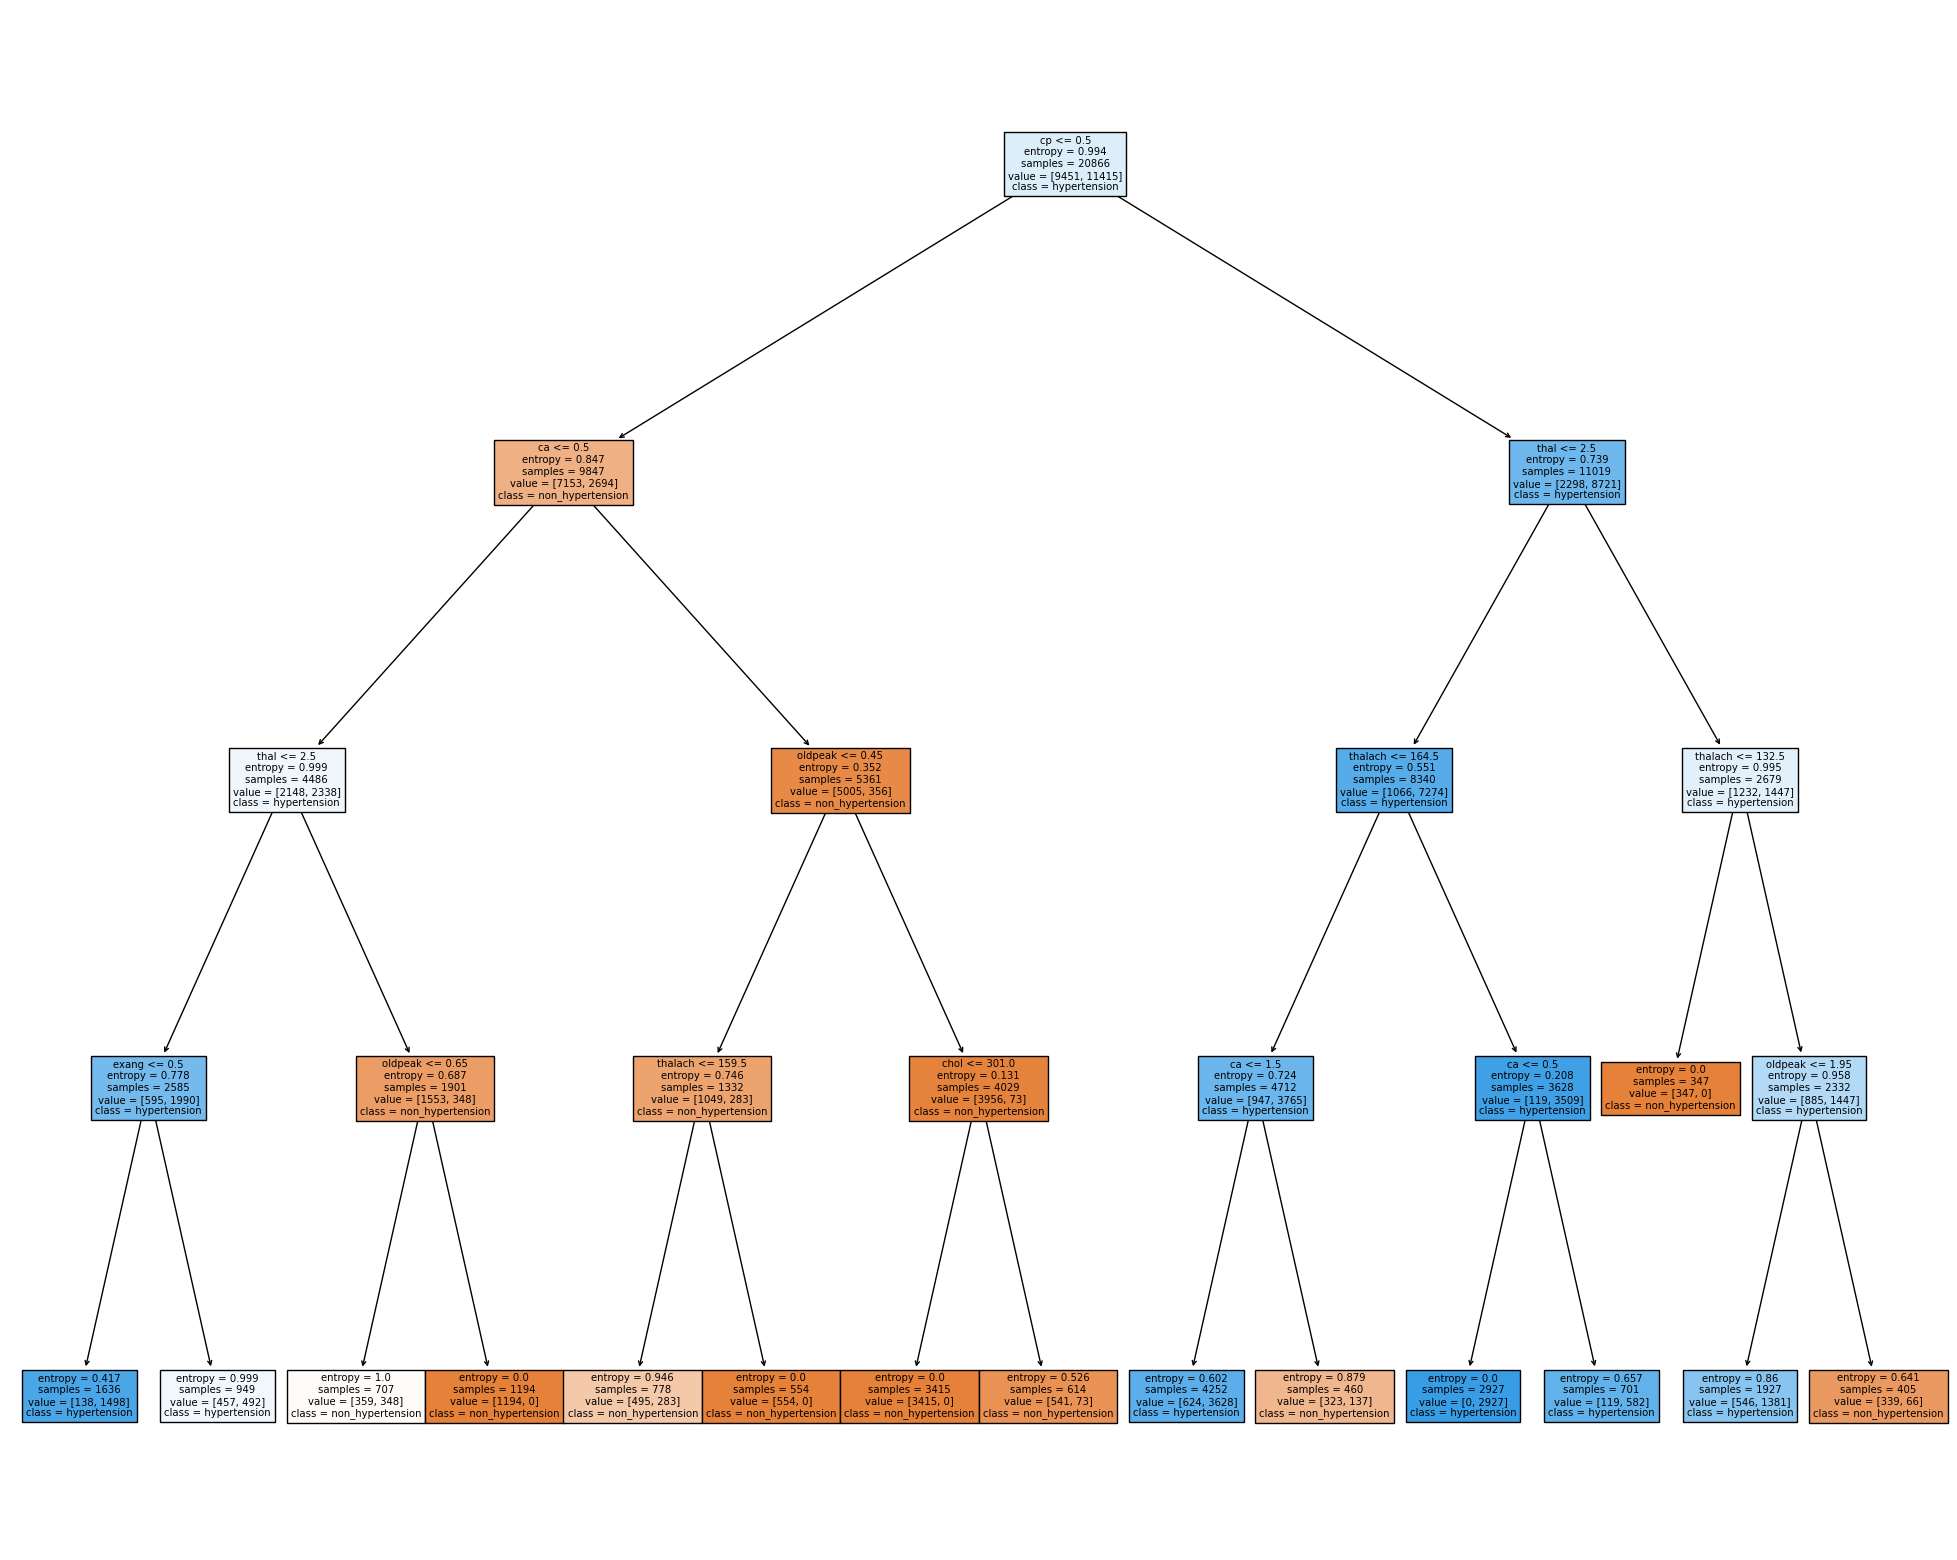

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['non_hypertension', 'hypertension'],
                   filled=True)         

# Deployment 
Tahap ini melibatkan implementasi hasil analisis data ke dalam lingkungan bisnis. Hasil dan wawasan yang diperoleh dari analisis data diterapkan dalam konteks bisnis yang sesuai. Ini dapat melibatkan pembuatan laporan, pengembangan aplikasi, atau penggunaan wawasan untuk pengambilan keputusan. 

Setelah melakukan tahap tahap dalam crips dm terakhir yaitu mengimplementasikannya dalam bentuk file csv yang sudah sesuai dengan model algortima decision tree pada codingan df.to_csv('hypertension-data.csv', index=False). implementasi ini menggunakan streamlit.